In [ ]:
!pip install pdf2image # para vizualizar os resultados

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Definindo Variáveis Importantes

Neste bloco, vamos definir as variáveis para os diretórios que utilizaremos durante o processo:

- **Diretório da Observação**:  
  Caminho para os arquivos de observação.

- **Diretório da Previsão**:  
  Caminho para os arquivos de previsão.

- **Diretório do Arquivo de Configuração**:  
  Caminho para o arquivo que será usado para configuração do modelo.

- **Diretório dos Arquivos de Saída**:  
  Caminho onde os arquivos de saída serão salvos após a execução.

  Além disso, serão definidos os arquivos que poderão ser usados


In [200]:
home_directory = os.path.expanduser("~")
print(home_directory)
DIR_OBS = os.path.join(home_directory, "DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/")
print(DIR_OBS)
DIR_FCT = os.path.join(home_directory, "DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/")
print(DIR_FCT)
DIR_CONFIG = os.path.join(home_directory, "DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/")
print(DIR_CONFIG)
DIR_OUT  = os.path.join(home_directory, "DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/saida_MODE_testes/")
print(DIR_OUT)

obs_circulo = 'obs_circulos.nc'
fct_circulo = 'fct_circulos.nc'

obs_elipse = 'obs_elipse.nc'
fct_elipse = 'fct_elipse.nc'

/home/victor
/home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/
/home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/
/home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/
/home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/saida_MODE_testes/


# Criando o Arquivo de Configuração do MODE

Neste notebook, vamos criar um **arquivo de configuração** para o **MODE**. Você poderá modificar algumas variáveis e observar como o **MODE** se comporta para diferentes valores.

## Etapas:

1. **Definição das variáveis**  
   - Diretórios de previsão e observação  
   - Nome do arquivo de configuração  
   - Caminho dos arquivos de saída  

2. **Geração do arquivo de configuração**  
   - O arquivo será criado com os parâmetros definidos  
   - Você poderá alterar valores e realizar experimentos  

Parâmetro grid_res – Resolução da Grade

O parâmetro grid_res define o espaçamento nominal para cada quadrado da grade em **quilômetros**. Embora esse valor **não seja utilizado diretamente** no código, ele é utilizado indiretamente para definir outras entradas no arquivo de configuração.

### Como Funciona:

- O `grid_res` serve como base para calcular as configurações de resolução para outros parâmetros da grade no modelo.
- Definindo corretamente o grid_res, você garante que os valores padrão para os outros parâmetros do arquivo de configuração sejam apropriados, pois os cálculos de parâmetros subsequentes são realizados em função dessa resolução.

### Exemplo de Configuração:

```yaml
grid_res: 4  # Definindo a resolução da grade como 4 quilômetros

Censurando Valores dos Dados Brutos:
Antes de definir objetos no MODE, podemos remover ou substituir valores específicos usando as configurações censor_thresh e censor_val.

censor_thresh = [ <0, >100 ]  # Remove valores menores que 0 e maiores que 100
censor_val = [ 0, 100 ]       # Define novos valores para os dados censurados

Suavização e Identificação de Objetos no MODE
Para definir objetos no MODE, utilizamos dois parâmetros importantes:

## Parâmetro `conv_radius' – Raio de Convolução
Define o raio da convolução circular aplicada para suavizar os campos brutos.
Os valores são especificados em unidades de grade (grid units), e múltiplos valores podem ser definidos em uma lista.

Exemplos:

conv_radius = [ 5 ]  # Para aplicar em uma única suavização
conv_radius = [ 5, 10, 15 ]  # Aplica suavização com raios de 5, 10 e 15 unidades de grade
✅ Raio maior: Resulta em um campo mais suavizado, reduzindo detalhes pequenos.
✅ Raio menor: Mantém mais detalhes na identificação dos objetos.

# Parâmetro `conv_thresh` – Limiar de Convolução
Define os valores mínimos que o campo suavizado deve ter para que um objeto seja identificado. Também pode ser especificado como uma lista para diferentes limiares.

Exemplos:

conv_thresh = [ '>=5.0' ]  # Para um único valor
conv_thresh = [ '>=5.0', '>=10.0', '>=15.0' ]  # Limiares para cada suavização
✅ Valores menores identificam mais objetos, incluindo áreas menos intensas.
✅ Valores maiores identificam apenas as áreas mais intensas.

Parâmetro vld_thresh – Limiar de Dados Válidos
O parâmetro vld_thresh controla a quantidade de dados válidos necessária para realizar a convolução circular no MODE. Ele define a proporção de dados inválidos permitidos na área de convolução. Se a proporção de dados inválidos for maior ou igual ao limiar, o valor resultante da convolução será considerado dado inválido.

Como Funciona:
Se a proporção de dados inválidos na área de convolução for maior ou igual ao valor de vld_thresh, o valor resultante da convolução será marcado como dado inválido.
Se a proporção de dados inválidos for menor que o valor de vld_thresh, a convolução será realizada apenas com os dados válidos.
Valor Padrão:
O valor padrão de vld_thresh é 0.5 (50%). Ou seja, a convolução será realizada apenas se pelo menos 50% dos dados na área de convolução forem válidos.

Exemplo de Configuração:
vld_thresh: 0.5  # Proporção de dados válidos necessária para a convolução
Parâmetro merge_thresh – Limiar de Mesclagem
O parâmetro merge_thresh é utilizado para definir objetos maiores que serão usados para mesclar os objetos originais. Ele define o valor do limiar utilizado na técnica de mesclagem de dois limiares (double thresholding). Para que essa técnica de mesclagem seja aplicada, ela deve ser solicitada tanto para os campos de previsão quanto para as observações.

Como Funciona:
O merge_thresh define limiares para objetos maiores que completamente contêm os objetos definidos originalmente. Ou seja, ele ajusta o tamanho dos objetos para que objetos menores sejam mesclados dentro de objetos maiores.
Por exemplo, para objetos definidos como >=5.0, um limiar de mesclagem de >=2.5 irá criar objetos maiores que englobam totalmente os objetos originais. Assim, qualquer dois objetos originais que estejam dentro de um mesmo objeto maior serão mesclados.
Limiar de Mesclagem:
O valor padrão do merge_thresh é >=1.25, o que significa que a mesclagem ocorre quando os objetos são maiores que 1.25 unidades.
Vários limiares de mesclagem podem ser definidos como um array, permitindo a avaliação de diferentes limiares em uma única execução, como no exemplo abaixo:

merge_thresh = [ >=3.0 ]  # Para único limiar
merge_thresh = [ >=1.0, >=2.0, >=3.0 ]  # Define diferentes limiares para mesclar objetos

Parâmetros weights e inten_perc_value – Atribuição de Peso e Percentil de Intensidade
Os parâmetros de peso controlam a importância relativa de cada atributo par-a-par ao calcular o valor total de interesse para os pares de objetos. Esses pesos são utilizados para calcular a similaridade ou dissimilaridade entre objetos, levando em conta vários atributos de suas formas e características.

Atributos para os quais os pesos são definidos:
Centroid Distance: Distância entre os centroides dos objetos.
Boundary Distance (ou Minimum Distance): Distância mínima entre as fronteiras dos objetos.
Convex Hull Distance: Distância mínima entre os cascos convexos (convex hulls) dos objetos.
Orientation Angle Difference: Diferença no ângulo de orientação entre os objetos.
Aspect Ratio Difference: Diferença na razão de aspecto dos objetos.
Object Area Ratio: Razão entre a área mínima e a área máxima dos objetos.
Intersection-to-Minimum Area Ratio: Razão entre a interseção e a área mínima dos objetos.
Curvature Ratio: Razão da curvatura dos objetos.
Complexity Ratio: Razão de complexidade dos objetos.
Intensity Ratio: Razão de intensidade entre os objetos.
Como Funciona:
Os pesos não precisam somar a um valor específico.

Quando o valor total de interesse é calculado para um par de objetos, a soma ponderada dos atributos é normalizada pela soma dos pesos.

Por exemplo, se os pesos atribuídos a diferentes atributos forem [0.5, 1.0, 1.5], o cálculo da similaridade considerará esses pesos proporcionalmente, dando mais importância ao atributo com peso 1.5.

In [283]:
MODELO = "Teste_calibração"
output_prefix = "teste"

name = "precipitation_circles"; # Estudo de caso circulo
#name = "precipitation_ellipses"; # Estudo de caso elipse

# Grade
grid_res = 5

# Limiares
censor_thresh      = [ ]
censor_val         = [  ]
conv_radius = [ 5 ]
conv_thresh = [ '>=80.0']
vld_thresh         = 0.5
filter_attr_name   = []
filter_attr_thresh = []
merge_thresh       = '>=20'

max_centroid_dist = "1000.0/grid_res"

# Pesos para avaliação
centroid_dist = 5.0
boundary_dist = 4.0
convex_hull_dist = 4.0
angle_diff = 4.0
aspect_diff = 3.0
area_ratio = 5.0
int_area_ratio = 4.0
curvature_ratio = 2.0
complexity_ratio = 2.0
inten_perc_ratio = 1.0
inten_perc_value = 50



# Esses são alguns parâmetros do MODE, existem outros muitos que podem ser encontrados na documentação

## Este é um arquivo de configuração para leitura de arquivos NETCDF.

In [284]:
# Conteúdo do arquivo de configuração
config_content = f"""
////////////////////////////////////////////////////////////////////////////////
//
// MODE configuration file.
//
// For additional information, please see the MET User's Guide.
//
////////////////////////////////////////////////////////////////////////////////

//
// Output model name to be written
//
model = \"{MODELO}\";

//
// Output description to be written
//
desc = "NA";

//i
// Output observation type to be written
//
obtype = "ANALYS";

////////////////////////////////////////////////////////////////////////////////

//
// Verification grid
//
regrid = {{
   to_grid    = NONE;
   method     = NEAREST;
   width      = 1;
   vld_thresh = 1.0;
   shape      = SQUARE;
}}

////////////////////////////////////////////////////////////////////////////////

//
// Approximate grid resolution (km)
//
grid_res = {grid_res};

////////////////////////////////////////////////////////////////////////////////

//
// Run all permutations of radius and threshold
//
quilt = FALSE;

//
// Forecast and observation fields to be verified
//
fcst = {{
   file_type = NETCDF_NCCF;
   field = {{
      name = \"{name}\";
      level = "(0,*,*)";
      set_attr_name = "FCT";
      set_attr_units = "mm";
      valid_time = "20250128_000000";
      init_time = "20250128_000000";
   }}

   censor_thresh      = {censor_thresh};
   censor_val         = {censor_val};
   conv_radius        = {conv_radius};
   conv_thresh        = {conv_thresh};
   vld_thresh         = {vld_thresh};
   filter_attr_name   = {filter_attr_name};
   filter_attr_thresh = {filter_attr_thresh};
   merge_thresh       = {merge_thresh};
   merge_flag         = NONE;
}}

obs = {{
   file_type = NETCDF_NCCF;
   field = {{
      name = \"{name}\";
      level = "(0,*,*)";
      set_attr_name = "OBS";
      set_attr_units = "mm";
      valid_time = "20250128_000000";
      init_time = "20250128_000000";
   }}

   censor_thresh      = {censor_thresh};
   censor_val         = {censor_val};
   conv_radius        = {conv_radius};
   conv_thresh        = {conv_thresh};
   vld_thresh         = {vld_thresh};
   filter_attr_name   = {filter_attr_name};
   filter_attr_thresh = {filter_attr_thresh};
   merge_thresh       = {merge_thresh};
   merge_flag         = NONE;
   
}}

////////////////////////////////////////////////////////////////////////////////

//
// Handle missing data
//
mask_missing_flag = NONE;

//
// Match objects between the forecast and observation fields
//
match_flag = THRESH;

//
// Maximum centroid distance for objects to be compared
//
max_centroid_dist = {max_centroid_dist};

////////////////////////////////////////////////////////////////////////////////

//
// Verification masking regions
//
mask = {{
   grid      = "";
   grid_flag = NONE; // Apply to NONE, FCST, OBS, or BOTH
   poly      = "";
   poly_flag = NONE; // Apply to NONE, FCST, OBS, or BOTH
}}

////////////////////////////////////////////////////////////////////////////////

//
// Fuzzy engine weights
//
weight = {{
   centroid_dist = {centroid_dist};
   boundary_dist = {boundary_dist};
   convex_hull_dist = {convex_hull_dist};
   angle_diff = {angle_diff};
   aspect_diff = {aspect_diff};
   area_ratio = {area_ratio};
   int_area_ratio = {int_area_ratio};
   curvature_ratio = {curvature_ratio};
   complexity_ratio = {complexity_ratio};
   inten_perc_ratio = {inten_perc_ratio};
   inten_perc_value = {inten_perc_value};
}}

////////////////////////////////////////////////////////////////////////////////

//
// Fuzzy engine interest functions
//
interest_function = {{

   centroid_dist = (
      (            0.0, 1.0 )
      (  60.0/grid_res, 1.0 )
      ( 600.0/grid_res, 0.0 )
   );

   boundary_dist = (
      (            0.0, 1.0 )
      ( 400.0/grid_res, 0.0 )
   );

   convex_hull_dist = (
      (            0.0, 1.0 )
      ( 400.0/grid_res, 0.0 )
   );

   angle_diff = (
      (  0.0, 1.0 )
      ( 30.0, 1.0 )
      ( 90.0, 0.0 )
   );

   aspect_diff = (
      (  0.00, 1.0 )
      (  0.10, 1.0 )
      (  0.75, 0.0 )
   );

   corner   = 0.8;
   ratio_if = (
      (    0.0, 0.0 )
      ( corner, 1.0 )
      (    1.0, 1.0 )
   );

   area_ratio = ratio_if;

   int_area_ratio = (
      ( 0.00, 0.00 )
      ( 0.10, 0.50 )
      ( 0.25, 1.00 )
      ( 1.00, 1.00 )
   );

   curvature_ratio = ratio_if;

   complexity_ratio = ratio_if;

   inten_perc_ratio = ratio_if;
}}

////////////////////////////////////////////////////////////////////////////////

//
// Total interest threshold for determining matches
//
total_interest_thresh = 0.7;

//
// Interest threshold for printing output pair information
//
print_interest_thresh = 0.0;

////////////////////////////////////////////////////////////////////////////////

//
// Plotting information
//
met_data_dir = "MET_BASE";

fcst_raw_plot = {{
   color_table      = "MET_BASE/colortables/met_default.ctable";
   plot_min         = 0.0;
   plot_max         = 0.0;
}}

obs_raw_plot = {{
   color_table      = "MET_BASE/colortables/met_default.ctable";
   plot_min         = 0.0;
   plot_max         = 0.0;
}}

object_plot = {{
   color_table      = "MET_BASE/colortables/mode_obj.ctable";
}}

//
// Boolean for plotting on the region of valid data within the domain
//
plot_valid_flag = FALSE;

//
// Plot polyline edges using great circle arcs instead of straight lines
//
plot_gcarc_flag = FALSE;

////////////////////////////////////////////////////////////////////////////////

//
// NetCDF matched pairs, PostScript, and contingency table output files
//
ps_plot_flag    = TRUE;
nc_pairs_flag   = {{
   latlon       = TRUE;
   raw          = TRUE;
   object_raw   = TRUE;
   object_id    = TRUE;
   cluster_id   = TRUE;
   polylines    = TRUE;
}}
ct_stats_flag   = TRUE;

////////////////////////////////////////////////////////////////////////////////

shift_right = 0;   //  grid squares

////////////////////////////////////////////////////////////////////////////////

output_prefix  = \"{output_prefix}\";
version        = "V11.1.0";

////////////////////////////////////////////////////////////////////////////////
"""

In [285]:
## Escreva o nome do arquivo de configuração

arquivo_de_configuracao = "Teste_elipse_config"

In [286]:
CONFIG_FILE = os.path.join(DIR_OBS, arquivo_de_configuracao)

In [287]:
with open(CONFIG_FILE, "w") as config_file:
    config_file.write(config_content)

In [288]:
%cd {home_directory}/DTC/MET-11.1.1/bin

/home/victor/DTC/MET-11.1.1/bin


Rodando o MODE: 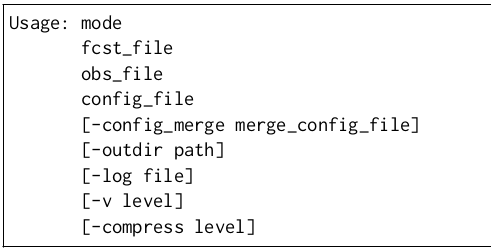

Neste exemplo estou no diretório /bin

In [289]:
!./mode {DIR_FCT}{fct_circulo} {DIR_OBS}{obs_circulo} {DIR_CONFIG}{arquivo_de_configuracao} -outdir {DIR_OUT}


DEBUG 1: Start mode by victor(1000) at 2025-01-29 19:34:35Z  cmd: ./mode /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/fct_circulos.nc /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/obs_circulos.nc /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/Teste_elipse_config -outdir /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/saida_MODE_testes/ 
DEBUG 1: Running mode front end SingleVar
DEBUG 1: Default Config File: /home/victor/DTC/MET-11.1.1/share/met/config/MODEConfig_default
DEBUG 1: Match Config File: /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/Teste_elipse_config
DEBUG 1: Merge Config File: /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/Teste_elipse_config
DEBUG 1: Forecast File: /home/victor/DTC/MET-11.1.1/MET-11.1.1/data/datain/MODE_MET_br/MODE_testes/fct_circulos.nc
DEBUG 1: Observation File: /home/victor/DTC/MET-11

# Este trecho transforma o arquivo de saida .ps em um pdf para melhor visualização

In [290]:
!gs -dBATCH -dNOPAUSE -sDEVICE=pdfwrite -sOutputFile={DIR_OUT}teste.pdf {DIR_OUT}mode_{output_prefix}_000000L_20250128_000000V_000000A.ps


GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Loading NimbusRoman-Regular font from /usr/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 5126996 3589272 1954752 655620 1 done.
Loading NimbusRoman-Bold font from /usr/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Bold... 5376604 4005559 1974952 671968 1 done.
Loading P052-Bold font from /usr/share/ghostscript/9.55.0/Resource/Font/P052-Bold... 5604316 4269316 1974952 671014 1 done.
Loading P052-Roman font from /usr/share/ghostscript/9.55.0/Resource/Font/P052-Roman... 5872428 4531787 1974952 674568 1 done.


# Saída do MODE

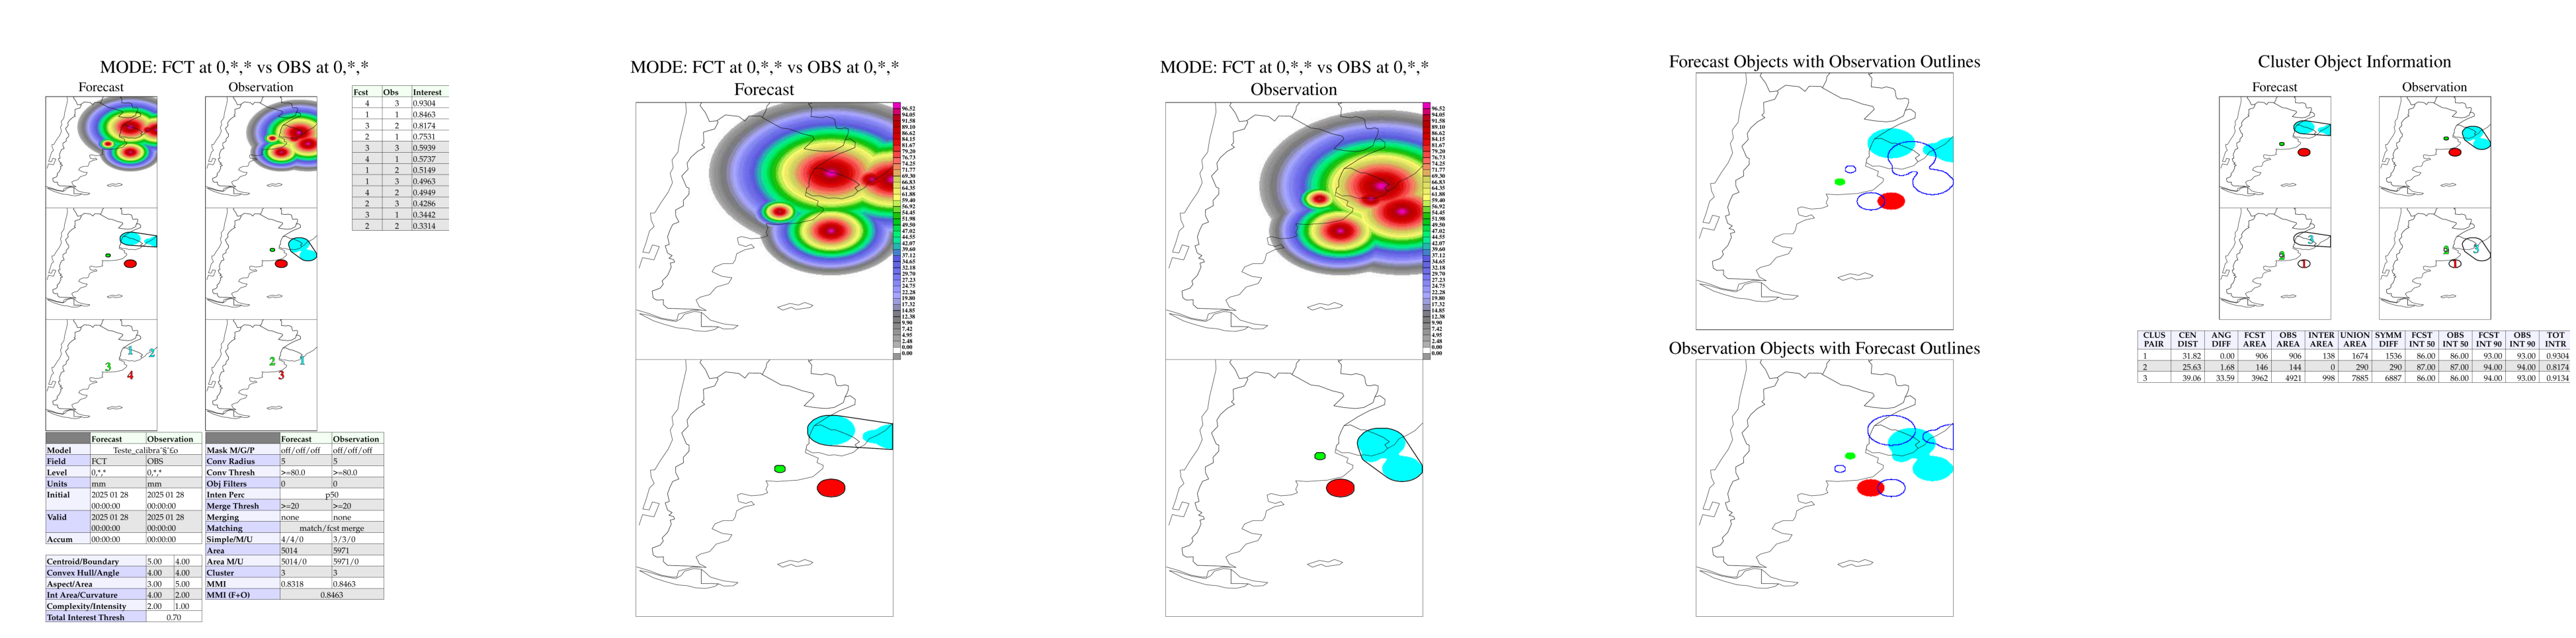

In [291]:
from pdf2image import convert_from_path
file_name = "teste.pdf"
# Caminho completo para o arquivo PDF
pdf_path = DIR_OUT + file_name

pages = convert_from_path(pdf_path, dpi=200)

num_cols = len(pages)  # O número de imagens a ser exibido em linha
num_rows = 1  # Apenas uma linha

# Cria uma figura com subgráficos em linha
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 20))  # Ajuste o tamanho da figura conforme necessário

# Exibe cada imagem em seu respectivo eixo
for i in range(num_cols):
    axes[i].imshow(pages[i])
    axes[i].axis("off")  # Desativa os eixos para uma exibição limpa

#plt.tight_layout()  # Ajusta automaticamente o layout para que as imagens fiquem bem distribuídas
plt.show()

# Saída dos arquivos .txt do MODE

In [250]:
files_cts_path = DIR_OUT + "mode_teste_000000L_20250128_000000V_000000A_cts.txt"
df = pd.read_csv(files_cts_path, sep=r'\s+')
df.T

,0,1
VERSION,V11.1.1,V11.1.1
MODEL,Teste_calibração,Teste_calibração
N_VALID,160000,160000
GRID_RES,5,5
DESC,NaN,NaN
FCST_LEAD,0,0
FCST_VALID,20250128_000000,20250128_000000
FCST_ACCUM,0,0
OBS_LEAD,0,0
OBS_VALID,20250128_000000,20250128_000000


In [251]:
files_obj_path = DIR_OUT + "mode_teste_000000L_20250128_000000V_000000A_obj.txt"
df = pd.read_csv(files_obj_path, sep=r'\s+')
df.T

,0,1,2,3,4,5
VERSION,V11.1.1,V11.1.1,V11.1.1,V11.1.1,V11.1.1,V11.1.1
MODEL,Teste_calibração,Teste_calibração,Teste_calibração,Teste_calibração,Teste_calibração,Teste_calibração
N_VALID,160000,160000,160000,160000,160000,160000
GRID_RES,5,5,5,5,5,5
DESC,NaN,NaN,NaN,NaN,NaN,NaN
FCST_LEAD,0,0,0,0,0,0
FCST_VALID,20250128_000000,20250128_000000,20250128_000000,20250128_000000,20250128_000000,20250128_000000
FCST_ACCUM,0,0,0,0,0,0
OBS_LEAD,0,0,0,0,0,0
OBS_VALID,20250128_000000,20250128_000000,20250128_000000,20250128_000000,20250128_000000,20250128_000000
